# Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Importing data

In [2]:
original_data = pd.read_csv('fifa21_train.csv')
validation_data = pd.read_csv('fifa21_validate.csv')

# Data cleaning

In [3]:
original_data.head(3)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80


In [4]:
original_data.shape

(11701, 101)

In [5]:
print(original_data.columns.tolist())

['ID', 'Name', 'Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB'

In [6]:
round(original_data.isna().sum()/len(original_data),4)*100

ID                   0.00
Name                 0.00
Age                  0.00
Nationality          0.00
Club                 0.15
BP                   0.00
Position             2.46
Team & Contract      0.00
Height               0.00
Weight               0.00
foot                 0.00
Growth               0.00
Joined               0.35
Loan Date End       94.62
Value                0.00
Wage                 0.00
Release Clause       0.00
Contract             0.00
Attacking            0.00
Crossing             0.00
Finishing            0.00
Heading Accuracy     0.00
Short Passing        0.00
Volleys              0.35
Skill                0.00
Dribbling            0.00
Curve                0.35
FK Accuracy          0.00
Long Passing         0.00
Ball Control         0.00
Movement             0.00
Acceleration         0.00
Sprint Speed         0.00
Agility              0.35
Reactions            0.00
Balance              0.35
Power                0.00
Shot Power           0.00
Jumping     

In [7]:
columns_raw=list(original_data.columns)

original_data.dropna(axis=1, thresh= 0.80*len(original_data), inplace=True) 
#thresh = x * len(DataFrame) => x: ratio of clean data to all data in rows of the dataframe. 
#The remaining is NaN value. 

columns_result=list(original_data.columns)

columns_dropped=list(set(columns_raw) - set(columns_result))

print(columns_dropped)

['Loan Date End']


In [8]:
def columns_nan(data, list):
    
    for a in list:
        data.drop(a, axis=1, inplace=True) #drop columns
    
    data.dropna(inplace=True) #drop NaN values
    
    return data

<!-- # Previously, 'Loan Date End' was dropped based on the ratio of NaN values.

# We dropped the columns ranging from ATTACKING to GK_REFLEXES because TOTAL STATS equals to sum of these columns.
# BASE STATS equals to sum of columns 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'.
# We already have BP so that we dropped the columns ranging from LS to GK.

# We do not need to have 'Position', 'Loan Date End','ID', 'Name','Joined', 'Team & Contract','Nationality',
# 'Club','Contract','Value', 'Wage','Release Clause','A/W','D/W','Hits' 
# because they do not have any influence on the calculation of OVERALL RATING. -->

In [9]:
# Previously, 'Loan Date End' was dropped based on the ratio of NaN values.

# We dropped the columns ranging from ATTACKING to GK_REFLEXES because TOTAL STATS equals to sum of these columns.
# BASE STATS equals to sum of columns 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'.
# We already have BP so that we dropped the columns ranging from LS to GK.

# We do not need to have 'Position', 'Loan Date End','ID', 'Name','Joined', 'Team & Contract','Nationality',
# 'Club','Contract','Value', 'Wage','Release Clause','A/W','D/W','Hits' 
# because they do not have any influence on the calculation of OVERALL RATING.

cols_drop = ['Position','ID', 'Name','Joined', 'Team & Contract','Nationality','Club',
             'Contract','Value', 'Wage','Release Clause','A/W','D/W','Hits',
             
             'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 
             'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 
              'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 
             'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 
             'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',  'Marking', 
             'Standing Tackle', 'Sliding Tackle', 'GK Diving', 'GK Handling', 'GK Kicking',
             'GK Positioning', 'GK Reflexes',
             
            'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 
             'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 
             'CB', 'RCB', 'RB', 'GK']      

In [10]:
original_data = columns_nan(original_data,cols_drop)

In [11]:
original_data.shape

(11701, 25)

In [12]:
original_data.head()

,Age,BP,Height,Weight,foot,Growth,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,26,CM,"5'9""",161lbs,Right,1,258,286,346,306,290,148,48,1682,357,4 ★,2★,1 ★,69,51,63,63,51,60,64
1,30,ST,"6'0""",159lbs,Right,0,365,375,404,372,313,77,55,1961,412,3 ★,4★,2 ★,83,75,68,82,33,71,77
2,33,CAM,"5'4""",134lbs,Right,0,336,424,424,308,332,80,21,1925,404,4 ★,4★,2 ★,80,77,78,86,27,56,80
3,22,CDM,"5'10""",152lbs,Right,13,242,259,282,277,257,168,42,1527,329,2 ★,2★,1 ★,57,44,54,57,57,60,59
4,23,CDM,"5'11""",150lbs,Right,8,249,280,324,280,294,185,52,1664,360,2 ★,3★,1 ★,66,44,60,64,60,66,65


## Remove unnecessary symbols

In [13]:
def headers_symbols(data,list2):
    data.columns = data.columns.str.replace('[#,@,&,%,?,!,-,:]','') #remove unnecessary symbols
    data.columns = data.columns.str.replace(' ','_')
    data.columns = data.columns.str.lower() #convert to lower case
    
    for col in list2:
        data[col] = data[col].str.rstrip('★')
        
    return data

In [14]:
star_columns = ['w/f','sm','ir']

In [15]:
original_data = headers_symbols(original_data,star_columns)

/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_4047/3364267983.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[#,@,&,%,?,!,-,:]','') #remove unnecessary symbols


In [16]:
original_data.head()

,age,bp,height,weight,foot,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,ova
0,26,CM,"5'9""",161lbs,Right,1,258,286,346,306,290,148,48,1682,357,4,2,1,69,51,63,63,51,60,64
1,30,ST,"6'0""",159lbs,Right,0,365,375,404,372,313,77,55,1961,412,3,4,2,83,75,68,82,33,71,77
2,33,CAM,"5'4""",134lbs,Right,0,336,424,424,308,332,80,21,1925,404,4,4,2,80,77,78,86,27,56,80
3,22,CDM,"5'10""",152lbs,Right,13,242,259,282,277,257,168,42,1527,329,2,2,1,57,44,54,57,57,60,59
4,23,CDM,"5'11""",150lbs,Right,8,249,280,324,280,294,185,52,1664,360,2,3,1,66,44,60,64,60,66,65


## Weight: convert to kg

In [17]:
def weight(data):
    data['weight']=data['weight'].str.strip('lbs')
    data['weight']=pd.to_numeric(data['weight'], errors='coerce')
    data['weight']=data['weight'].apply(lambda x: x*0.454)
    
    return data

In [18]:
original_data=weight(original_data)

In [19]:
original_data.head(3)

,age,bp,height,weight,foot,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,ova
0,26,CM,"5'9""",73.094,Right,1,258,286,346,306,290,148,48,1682,357,4,2,1,69,51,63,63,51,60,64
1,30,ST,"6'0""",72.186,Right,0,365,375,404,372,313,77,55,1961,412,3,4,2,83,75,68,82,33,71,77
2,33,CAM,"5'4""",60.836,Right,0,336,424,424,308,332,80,21,1925,404,4,4,2,80,77,78,86,27,56,80


## Height: convert to cm

In [20]:
def height(data):
    data['height']=data['height'].str.strip('"')
    height_conversions=[30.48,2.54]
    data['height']=data['height'].str.split("'").apply(pd.Series).astype(int).dot(height_conversions)
    data['height']=pd.to_numeric(data['height'], errors='coerce')
    return data

In [21]:
original_data = height(original_data)

In [22]:
original_data.head(3)

,age,bp,height,weight,foot,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,ova
0,26,CM,175.26,73.094,Right,1,258,286,346,306,290,148,48,1682,357,4,2,1,69,51,63,63,51,60,64
1,30,ST,182.88,72.186,Right,0,365,375,404,372,313,77,55,1961,412,3,4,2,83,75,68,82,33,71,77
2,33,CAM,162.56,60.836,Right,0,336,424,424,308,332,80,21,1925,404,4,4,2,80,77,78,86,27,56,80


## Converting categorical to numerical

In [23]:
def cat_num(data):
    data['w/f'] = pd.to_numeric(data['w/f'], errors='coerce')
    data['sm'] = pd.to_numeric(data['sm'], errors='coerce')
    data['ir'] = pd.to_numeric(data['ir'], errors='coerce')
    return data

In [24]:
original_data = cat_num(original_data)

In [25]:
original_data.head(3)

,age,bp,height,weight,foot,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,ova
0,26,CM,175.26,73.094,Right,1,258,286,346,306,290,148,48,1682,357,4,2,1,69,51,63,63,51,60,64
1,30,ST,182.88,72.186,Right,0,365,375,404,372,313,77,55,1961,412,3,4,2,83,75,68,82,33,71,77
2,33,CAM,162.56,60.836,Right,0,336,424,424,308,332,80,21,1925,404,4,4,2,80,77,78,86,27,56,80


# Distribution Plots

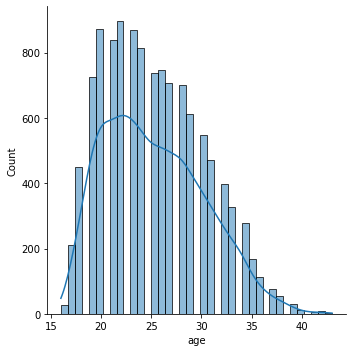

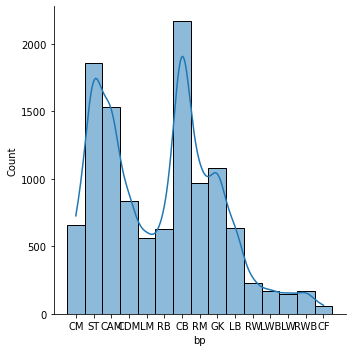

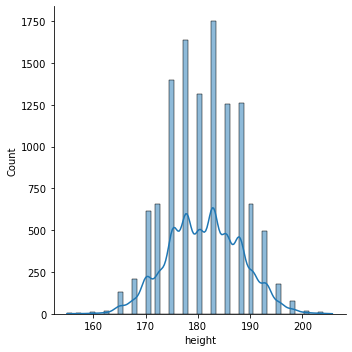

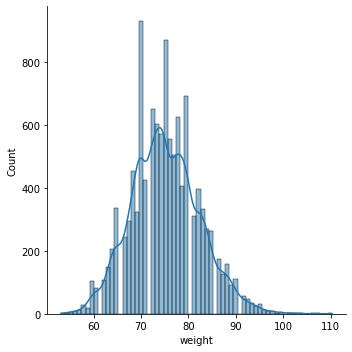

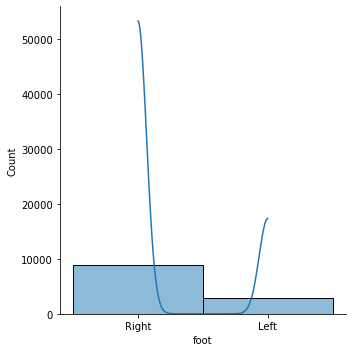

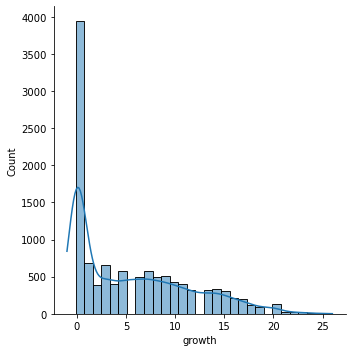

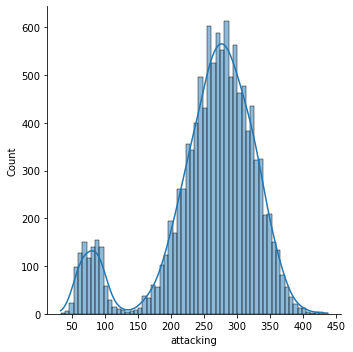

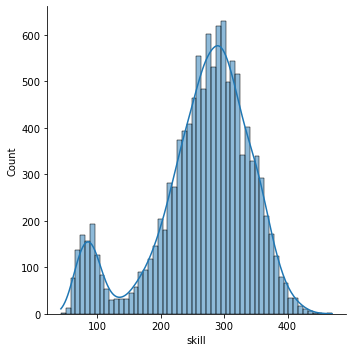

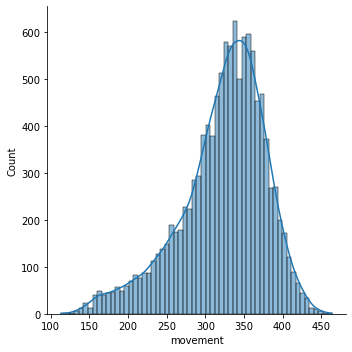

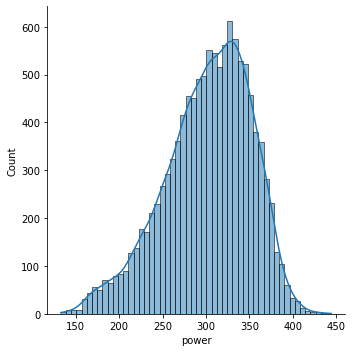

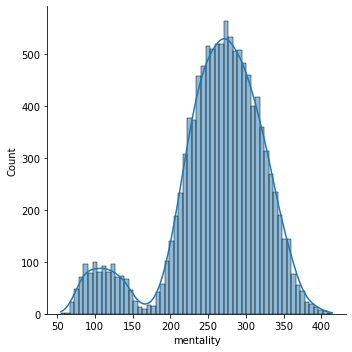

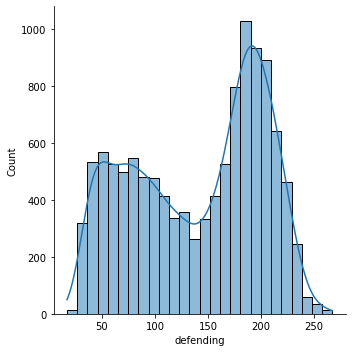

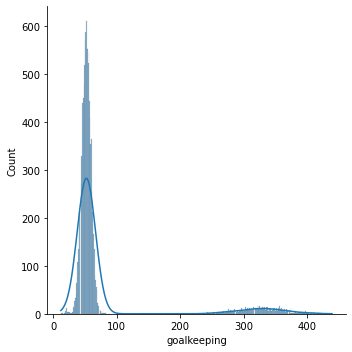

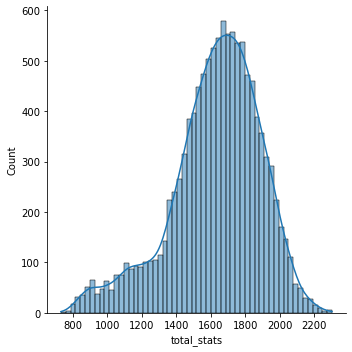

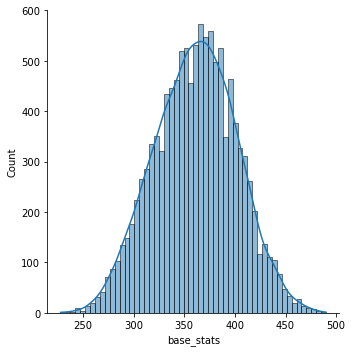

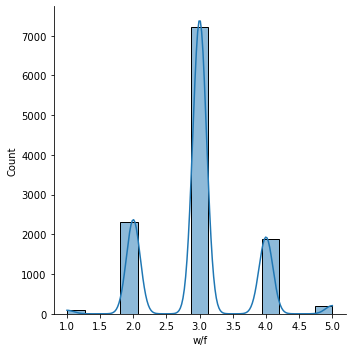

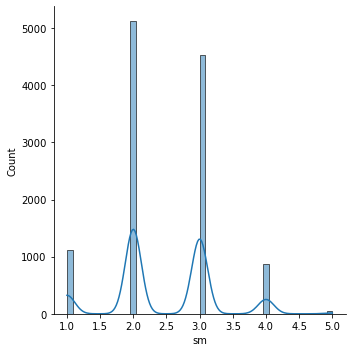

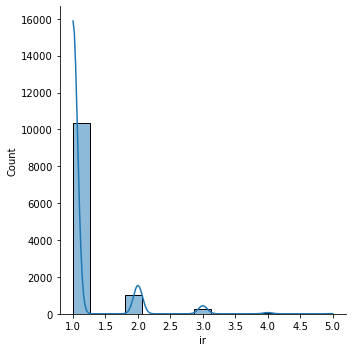

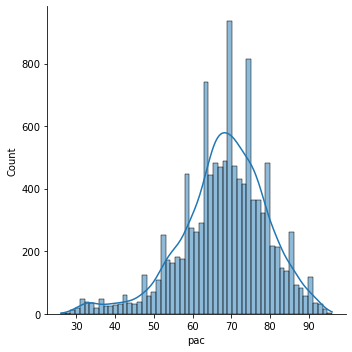

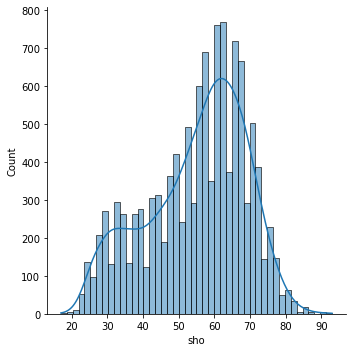

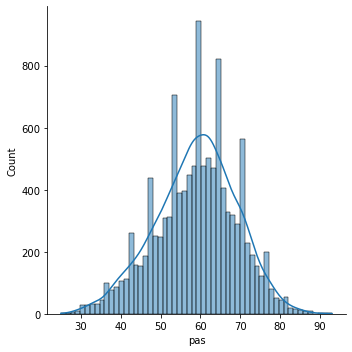

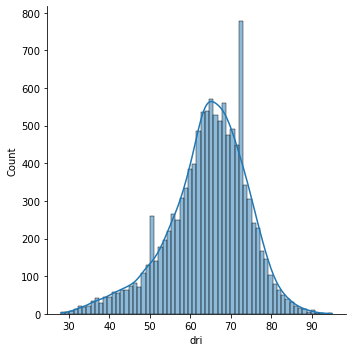

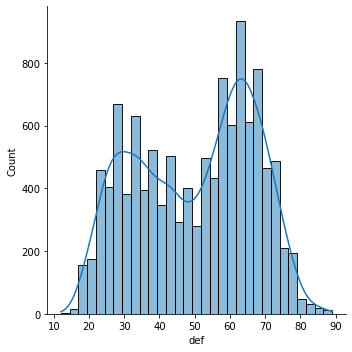

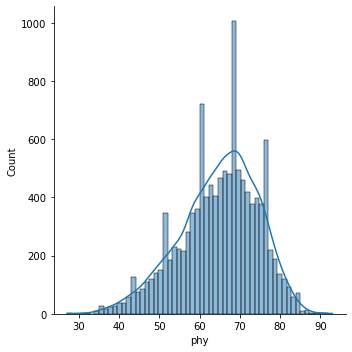

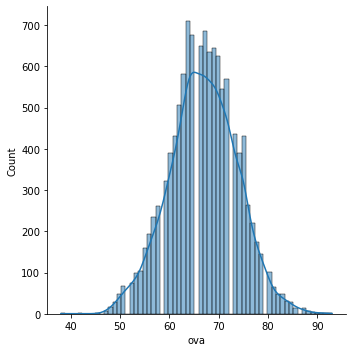

In [26]:
for c in original_data.columns:
    sns.displot(original_data[c], kde=True)
    plt.show()

# Multicollinearity

In [27]:
original_data_num=original_data.select_dtypes(include = np.number) #Get the numeric data into dataframe 
original_data_num

,age,height,weight,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,ova
0,26,175.26,73.094,1,258,286,346,306,290,148,48,1682,357,4,2,1,69,51,63,63,51,60,64
1,30,182.88,72.186,0,365,375,404,372,313,77,55,1961,412,3,4,2,83,75,68,82,33,71,77
2,33,162.56,60.836,0,336,424,424,308,332,80,21,1925,404,4,4,2,80,77,78,86,27,56,80
3,22,177.80,69.008,13,242,259,282,277,257,168,42,1527,329,2,2,1,57,44,54,57,57,60,59
4,23,180.34,68.100,8,249,280,324,280,294,185,52,1664,360,2,3,1,66,44,60,64,60,66,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,25,185.42,76.272,5,224,248,333,273,266,184,61,1589,347,3,2,1,75,28,56,59,60,69,65
11697,27,185.42,78.996,4,84,96,237,217,101,41,347,1123,387,2,1,1,72,67,66,72,40,70,70
11698,22,167.64,64.922,8,286,291,388,278,241,62,57,1603,337,3,3,1,76,60,60,72,26,43,67
11699,26,187.96,81.266,7,254,284,198,258,241,113,81,1429,400,3,1,3,72,63,70,72,57,66,68


In [28]:
#Correlations of numerical part of fifa21
correlations = original_data_num.corr()
correlations.head()

,age,height,weight,growth,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,ova
age,1.000000,0.095369,0.257338,-0.854136,0.191137,0.175981,-0.051802,0.314169,0.278804,0.117902,0.120656,0.286428,0.417633,0.088939,0.072587,0.402010,-0.176232,0.311175,0.402361,0.242675,0.225285,0.434448,0.519799
height,0.095369,1.000000,0.768096,-0.053797,-0.350153,-0.454377,-0.634614,-0.129197,-0.301619,-0.054541,0.349292,-0.367082,-0.118051,-0.161631,-0.423024,0.054875,-0.380658,-0.087724,-0.204511,-0.310837,0.090802,0.444814,0.028210
weight,0.257338,0.768096,1.000000,-0.219624,-0.250868,-0.352398,-0.536489,0.007573,-0.197294,-0.040950,0.321449,-0.242916,0.005588,-0.119104,-0.348603,0.119917,-0.341935,0.013883,-0.100392,-0.210029,0.101667,0.538053,0.149397
growth,-0.854136,-0.053797,-0.219624,1.000000,-0.281668,-0.262893,-0.101370,-0.427800,-0.348028,-0.157743,-0.050320,-0.395493,-0.516137,-0.104888,-0.165475,-0.269322,0.019677,-0.334891,-0.439781,-0.320569,-0.240244,-0.484123,-0.596642
attacking,0.191137,-0.350153,-0.250868,-0.281668,1.000000,0.928584,0.692493,0.823527,0.888604,0.311367,-0.769826,0.902862,0.425923,0.356096,0.765994,0.232224,0.181119,0.349931,0.370180,0.379978,0.103203,0.107896,0.433092


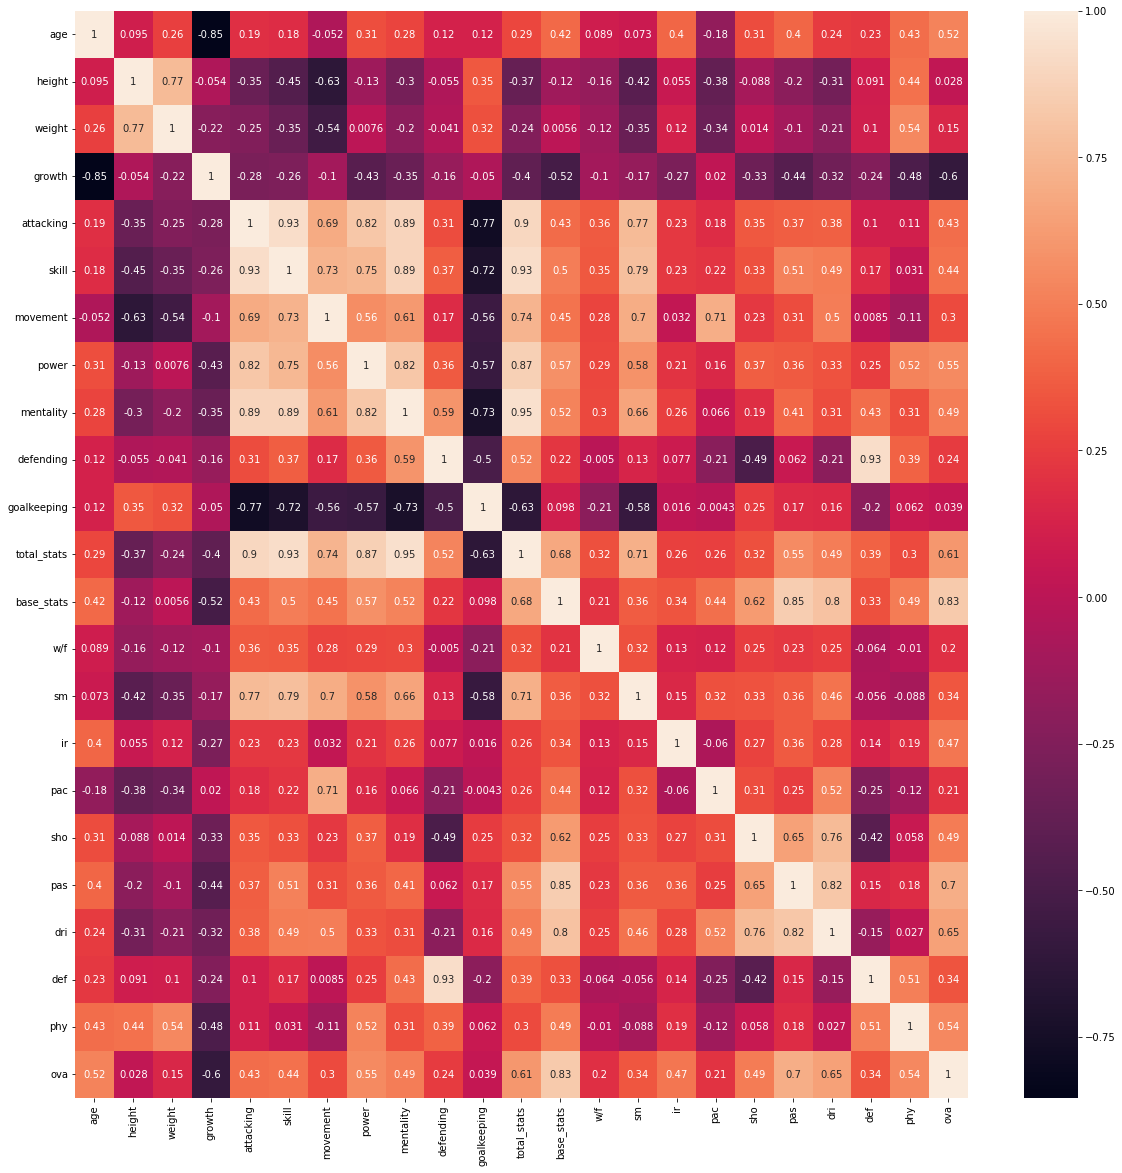

In [29]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)
plt.show()

In [30]:
# The columns making a high multicollinearity (i.e. > 0.9) were dropped.

original_data_num = original_data_num.drop(['attacking','skill','def','defending','mentality'], axis = 1)

In [31]:
# The columns making a high multicollinearity (i.e. > 0.9) were dropped.

original_data = original_data.drop(['attacking','skill','def','defending','mentality'], axis = 1)

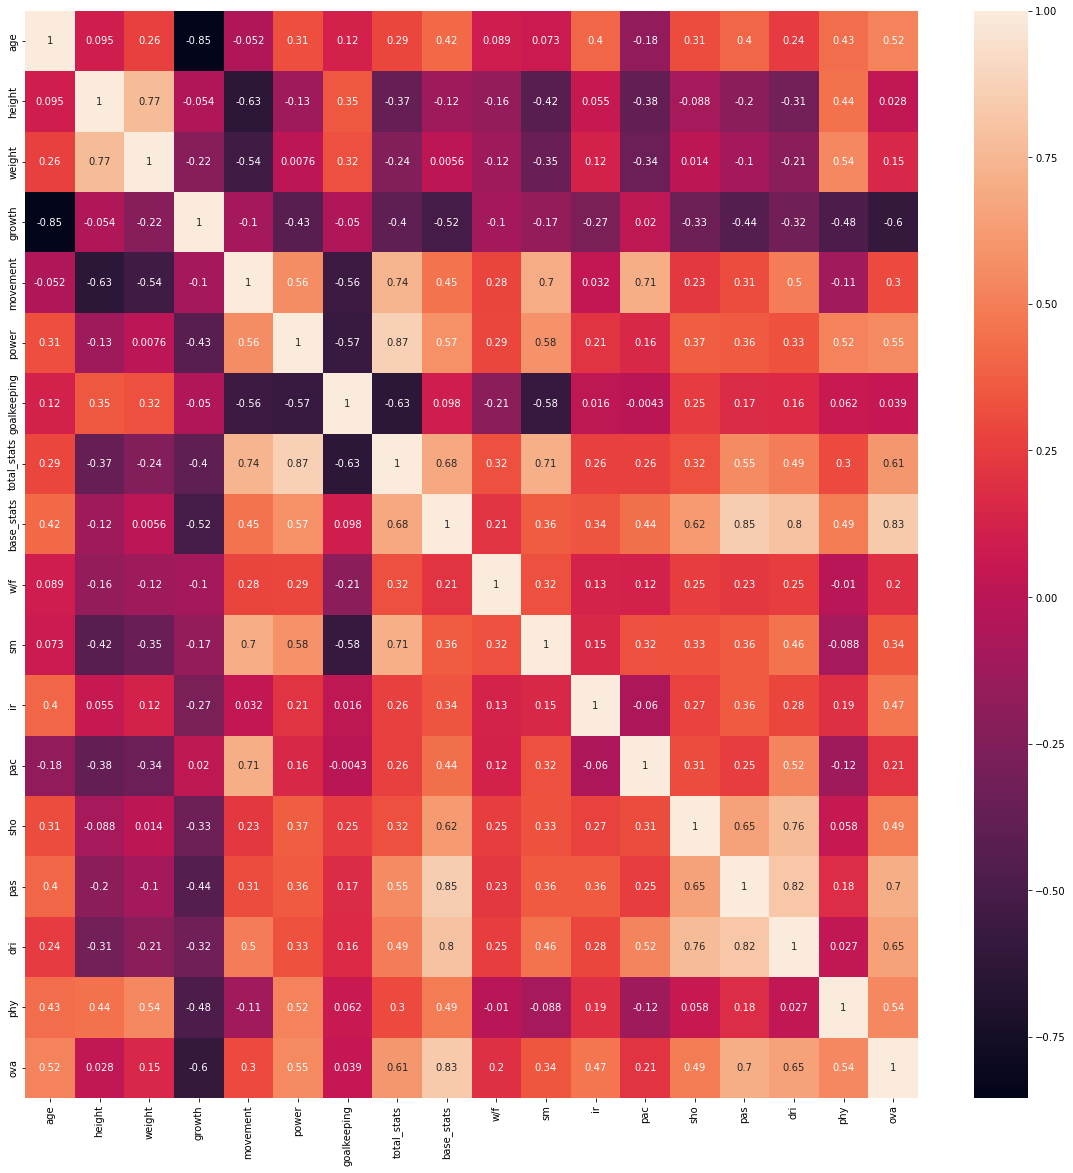

In [32]:
# The columns making a high multicollinearity (i.e. > 0.9) were dropped.
fig, ax = plt.subplots(figsize=(20,20))
ax=sns.heatmap(original_data_num.corr(), annot=True)
plt.show()

# X-y Split

In [33]:
#The target is OVA
y = original_data['ova']
y.shape

(11701,)

In [34]:
X = original_data.drop(['ova'], axis=1)
X.shape

(11701, 19)

In [35]:
X_num = X.select_dtypes(include = np.number)
X_num.head()

,age,height,weight,growth,movement,power,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,phy
0,26,175.26,73.094,1,346,306,48,1682,357,4,2,1,69,51,63,63,60
1,30,182.88,72.186,0,404,372,55,1961,412,3,4,2,83,75,68,82,71
2,33,162.56,60.836,0,424,308,21,1925,404,4,4,2,80,77,78,86,56
3,22,177.80,69.008,13,282,277,42,1527,329,2,2,1,57,44,54,57,60
4,23,180.34,68.100,8,324,280,52,1664,360,2,3,1,66,44,60,64,66


In [36]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)
X_normalized_scale = pd.DataFrame(X_normalized,columns=X_num.columns)
X_normalized_scale.head()

,age,height,weight,growth,movement,power,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,phy
0,0.370370,0.40,0.349206,0.074074,0.663818,0.556270,0.084309,0.604577,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.500000
1,0.518519,0.55,0.333333,0.037037,0.829060,0.768489,0.100703,0.781945,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.666667
2,0.629630,0.15,0.134921,0.037037,0.886040,0.562701,0.021077,0.759059,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.439394
3,0.222222,0.45,0.277778,0.518519,0.481481,0.463023,0.070258,0.506039,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.500000
4,0.259259,0.50,0.261905,0.333333,0.601140,0.472669,0.093677,0.593134,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.590909


In [37]:
X_cat = X.select_dtypes(include = object)
X_cat.head()

,bp,foot
0,CM,Right
1,ST,Right
2,CAM,Right
3,CDM,Right
4,CDM,Right


In [38]:
#Encoding categoricals
encoder = OneHotEncoder(drop='first').fit(X_cat)
cols = encoder.get_feature_names(input_features=X_cat.columns)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
print(encoder.categories_)

[array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB',
       'RB', 'RM', 'RW', 'RWB', 'ST'], dtype=object), array(['Left', 'Right'], dtype=object)]


In [40]:
encoded = encoder.transform(X_cat).toarray()
print(encoded)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
onehot_encoded = pd.DataFrame(encoded,columns=cols)
onehot_encoded.head(5)

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
X_normalized_scale.head()

,age,height,weight,growth,movement,power,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,phy
0,0.370370,0.40,0.349206,0.074074,0.663818,0.556270,0.084309,0.604577,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.500000
1,0.518519,0.55,0.333333,0.037037,0.829060,0.768489,0.100703,0.781945,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.666667
2,0.629630,0.15,0.134921,0.037037,0.886040,0.562701,0.021077,0.759059,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.439394
3,0.222222,0.45,0.277778,0.518519,0.481481,0.463023,0.070258,0.506039,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.500000
4,0.259259,0.50,0.261905,0.333333,0.601140,0.472669,0.093677,0.593134,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.590909


# CONCAT Minmax and OneHotEncoded

In [43]:
print(X_normalized_scale.shape,onehot_encoded.shape)

(11701, 17) (11701, 15)


In [44]:
# let's merge all this information together into a single dataset with all features, now numerical
X = pd.concat([X_normalized_scale, onehot_encoded], axis=1)  # np.concatenate()

In [45]:
X.shape

(11701, 32)

# TRAIN TEST SPLIT

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9360, 32)
(2341, 32)
(9360,)
(2341,)


In [48]:
X_train.head()

,age,height,weight,growth,movement,power,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,phy,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
1775,0.148148,0.55,0.380952,0.333333,0.566952,0.520900,0.091335,0.462174,0.305344,0.50,0.25,0.00,0.542857,0.565789,0.352941,0.447761,0.409091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2455,0.444444,0.60,0.468254,0.037037,0.270655,0.649518,0.088993,0.619835,0.431298,0.50,0.25,0.00,0.057143,0.815789,0.617647,0.582090,0.651515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93,0.629630,0.55,0.380952,0.037037,0.487179,0.562701,0.112412,0.575969,0.412214,0.50,0.25,0.25,0.357143,0.223684,0.470588,0.373134,0.712121,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8952,0.111111,0.55,0.468254,0.592593,0.584046,0.389068,0.063232,0.461538,0.335878,0.50,0.25,0.00,0.571429,0.381579,0.455882,0.432836,0.393939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7810,0.518519,0.50,0.420635,0.037037,0.851852,0.864952,0.081967,0.868404,0.812977,0.75,0.75,0.25,0.814286,0.828947,0.705882,0.761194,0.772727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [49]:
y_train.head()

1775    62
2455    74
93      69
8952    55
7810    79
Name: ova, dtype: int64

# Linear Regression Model

In [50]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [51]:
#R2
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.8446278336952686

In [52]:
predictions_test = lm.predict(X_test)
r2_score(y_test,predictions_test)

0.8460364692845368

In [53]:
y_test[:5]

2405     49
8025     70
10025    62
10933    72
1402     64
Name: ova, dtype: int64

In [54]:
predictions_test[:5]

array([51.56653101, 70.00408268, 65.70786705, 73.01773647, 64.60039113])

In [55]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

7.290257985614671

In [56]:
#Root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

2.7000477746911575

In [57]:
y_test.mean()

66.57624946604015

In [58]:
from sklearn.metrics import mean_absolute_error, r2_score

In [59]:
#Mean absolute error
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

2.0497719103120087


In [60]:
print('\nLinear Regression Model Results_ORIGINAL DATA\n')
print(' R2 SCORE: Train', round(r2_score(y_train, predictions),3), '| Test', round(r2_score(y_test, predictions_test),3))
print(' MSE SCORE: Train', round(mean_squared_error(y_test,predictions_test),3))
print(' RMSE SCORE: Train', round(np.sqrt(mean_squared_error(y_test,predictions_test)),3))
print(' MAE SCORE: Train', round(mean_absolute_error(y_test, predictions_test),3))


Linear Regression Model Results_ORIGINAL DATA

 R2 SCORE: Train 0.845 | Test 0.846
 MSE SCORE: Train 7.29
 RMSE SCORE: Train 2.7
 MAE SCORE: Train 2.05


# VALIDATION FILE

In [61]:
validation_data.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,Right,7,"Feb 8, 2018","Jun 30, 2021",€975K,€5K,€0,"Jun 30, 2021 On Loan",230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2 ★,2★,Low,High,1 ★,64,30,50,50,66,74,34,48+2,48+2,48+2,48+0,47+0,47+0,47+0,48+0,48+2,48+2,48+2,50+2,51+2,51+2,51+2,50+2,59+2,61+2,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,Right,5,"Jan 20, 2020",NaN,€1.2M,€3K,€2.2M,2020 ~ 2020,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4 ★,3★,High,Low,1 ★,74,67,62,74,24,57,12,64+2,64+2,64+2,68+0,68+0,68+0,68+0,68+0,68+2,68+2,68+2,67+2,61+2,61+2,61+2,67+2,49+2,47+2,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,Right,17,"Nov 28, 2018",NaN,€120K,€500,€249K,2018 ~ 2020,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2 ★,1★,Medium,Medium,1 ★,56,52,53,55,26,53,3,18+2,18+2,18+2,15+0,17+0,17+0,17+0,15+0,17+2,17+2,17+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,Right,23,"Jan 10, 2020",NaN,€160K,€500,€464K,2020 ~ 2022,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,3 ★,2★,Medium,Medium,1 ★,58,34,47,52,53,59,6,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,47+2,47+2,47+2,49+2,49+2,49+2,49+2,49+2,53+2,54+2,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,Right,5,"Jul 1, 2019",NaN,€2.3M,€13K,€4.3M,2019 ~ 2023,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,4 ★,2★,Medium,Medium,1 ★,67,62,68,70,69,71,45,63+2,63+2,63+2,66+0,66+0,66+0,66+0,66+0,68+2,68+2,68+2,67+2,70+2,70+2,70+2,67+2,70+2,72+2,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70


In [62]:
validation_data.shape

(1999, 101)

In [63]:
validation_data = columns_nan(validation_data,cols_drop) #remove NaN values

validation_data = headers_symbols(validation_data,star_columns) #remove unnecessary symbols

validation_data = weight(validation_data) #remove lbs and convert to kg
validation_data = height(validation_data) #remove char and convert to cm
validation_data = cat_num(validation_data) #convert categorical to numerical

/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_4047/3364267983.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[#,@,&,%,?,!,-,:]','') #remove unnecessary symbols


In [64]:
#X-y Split
#The target is OVA
y2 = original_data['ova']
y2.shape

(11701,)

In [65]:
X2 = original_data.drop(['ova'], axis=1)
X2.shape

(11701, 19)

In [66]:
X_num2 = X2.select_dtypes(include = np.number)
X_num2.head()

,age,height,weight,growth,movement,power,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,phy
0,26,175.26,73.094,1,346,306,48,1682,357,4,2,1,69,51,63,63,60
1,30,182.88,72.186,0,404,372,55,1961,412,3,4,2,83,75,68,82,71
2,33,162.56,60.836,0,424,308,21,1925,404,4,4,2,80,77,78,86,56
3,22,177.80,69.008,13,282,277,42,1527,329,2,2,1,57,44,54,57,60
4,23,180.34,68.100,8,324,280,52,1664,360,2,3,1,66,44,60,64,66


In [67]:
#Normalizing and Scaling validation data using previous transformer
#We do not need to fit again.

In [68]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
X_normalized = transformer.transform(X_num2)
X_normalized_scale = pd.DataFrame(X_normalized,columns=X_num2.columns)
X_normalized_scale.head()

,age,height,weight,growth,movement,power,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,phy
0,0.370370,0.40,0.349206,0.074074,0.663818,0.556270,0.084309,0.604577,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.500000
1,0.518519,0.55,0.333333,0.037037,0.829060,0.768489,0.100703,0.781945,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.666667
2,0.629630,0.15,0.134921,0.037037,0.886040,0.562701,0.021077,0.759059,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.439394
3,0.222222,0.45,0.277778,0.518519,0.481481,0.463023,0.070258,0.506039,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.500000
4,0.259259,0.50,0.261905,0.333333,0.601140,0.472669,0.093677,0.593134,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.590909


In [69]:
X_cat2 = X2.select_dtypes(include = object)
X_cat2.head()

,bp,foot
0,CM,Right
1,ST,Right
2,CAM,Right
3,CDM,Right
4,CDM,Right


In [70]:
#Encoding categoricals using previous encoder
#We do not need to fit again.
encoded = encoder.transform(X_cat2).toarray()
cols = encoder.get_feature_names(input_features=X_cat2.columns)
onehot_encoded = pd.DataFrame(encoded,columns=cols)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [71]:
print(encoder.categories_)

[array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB',
       'RB', 'RM', 'RW', 'RWB', 'ST'], dtype=object), array(['Left', 'Right'], dtype=object)]


In [72]:
print(encoded)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [73]:
onehot_encoded.head(5)

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
#CONCAT X_normalized_scale.shape,onehot_encoded.shape IN validation_file

In [75]:
print(X_normalized_scale.shape,onehot_encoded.shape)

(11701, 17) (11701, 15)


In [76]:
# let's merge all this information together into a single dataset with all features, now numerical
X2 = pd.concat([X_normalized_scale, onehot_encoded], axis=1)  # np.concatenate()

In [77]:
X2.shape

(11701, 32)

In [78]:
#Predict using previous model
#We do not need to fit again.

In [79]:
predictions_valid = lm.predict(X2)

In [80]:
# The results below show that the model is accurate. R2 is same when the model is built on original data
# and validation data. Moreover, the actuals values are close to predicted values (please see 3.9. linear
# regression model). In conclusion, our model accurately predicts the Overall Rating of the players.

In [81]:
print('\n\nLinear Regression Model Results_VALIDATION DATA\n')
print(' R2 SCORE: Train', round(r2_score(y2, predictions_valid),3), '| Test', round(r2_score(y2, predictions_valid),3))
print(' MSE SCORE: Train', round(mean_squared_error(y2,predictions_valid),3))
print(' RMSE SCORE: Train', round(np.sqrt(mean_squared_error(y2,predictions_valid)),3))
print(' MAE SCORE: Train', round(mean_absolute_error(y2, predictions_valid),3))

print('\nLinear Regression Model Results_ORIGINAL DATA\n')
print(' R2 SCORE: Train', round(r2_score(y_train, predictions),3), '| Test', round(r2_score(y_test, predictions_test),3))
print(' MSE SCORE: Train', round(mean_squared_error(y_test,predictions_test),3))
print(' RMSE SCORE: Train', round(np.sqrt(mean_squared_error(y_test,predictions_test)),3))
print(' MAE SCORE: Train', round(mean_absolute_error(y_test, predictions_test),3))



Linear Regression Model Results_VALIDATION DATA

 R2 SCORE: Train 0.845 | Test 0.845
 MSE SCORE: Train 7.327
 RMSE SCORE: Train 2.707
 MAE SCORE: Train 2.066

Linear Regression Model Results_ORIGINAL DATA

 R2 SCORE: Train 0.845 | Test 0.846
 MSE SCORE: Train 7.29
 RMSE SCORE: Train 2.7
 MAE SCORE: Train 2.05
